In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [27]:
x_train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
x_test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [28]:
x_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [29]:
x_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [31]:
y_train = x_train['price']
y_train

0          4200
1          4999
2         13900
3         45000
4         97500
          ...  
188528    27500
188529    30000
188530    86900
188531    84900
188532    28995
Name: price, Length: 188533, dtype: int64

In [33]:
x_train = x_train.drop(['id'],axis=1)
x_train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [32]:
x_test_id = x_test['id']
x_test_id

0         188533
1         188534
2         188535
3         188536
4         188537
           ...  
125685    314218
125686    314219
125687    314220
125688    314221
125689    314222
Name: id, Length: 125690, dtype: int64

In [34]:
x_test = x_test.drop(['id'],axis=1)
x_test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
125685,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [76]:
x_train = x_train.drop('price',axis=1)

In [50]:
x_test['clean_title'].nunique()


1

In [ ]:
labelencoder.fit(x_train['clean_title'])
x_train['clean_title']=labelencoder.transform(x_train['clean_title'])
x_test['clean_title']=labelencoder.transform(x_test['clean_title'])

In [70]:
x_train

,model_year,milage,fuel_type,engine,transmission,accident,price,brand_model_encoded,transmission_mean
0,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,1,4200,12778.315972,31711.979140
1,2002,143250,2,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,0,4999,11972.785714,31711.979140
2,2002,136731,1,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,1,13900,24054.754098,31711.979140
3,2017,19500,2,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,45000,48915.842105,50201.815580
4,2021,7388,2,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,1,97500,64855.673077,47123.507371
...,...,...,...,...,...,...,...,...,...
188528,2017,49000,2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,27500,51072.630631,50201.815580
188529,2018,28600,2,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,0,30000,56035.168224,56442.748656
188530,2021,13650,2,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,1,86900,64000.701754,47123.507371
188531,2022,13895,2,3.0L,1-Speed Automatic,1,84900,37505.533835,69596.758904


In [36]:
labelencoder.fit(x_train['accident'])
x_train['accident']=labelencoder.transform(x_train['accident'])
x_test['accident']=labelencoder.transform(x_test['accident'])
x_test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,1,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,1,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,1,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,1,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...
125685,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,1,Yes
125686,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,1,NaN
125687,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,1,Yes
125688,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,1,Yes


In [77]:
x_train

,model_year,milage,fuel_type,accident,brand_model_encoded,transmission_mean,engine_mean
0,2007,213000,2,1,12778.315972,31711.979140,11430.680233
1,2002,143250,2,0,11972.785714,31711.979140,12183.759494
2,2002,136731,1,1,24054.754098,31711.979140,18387.346939
3,2017,19500,2,1,48915.842105,50201.815580,42265.590426
4,2021,7388,2,1,64855.673077,47123.507371,37746.180897
...,...,...,...,...,...,...,...
188528,2017,49000,2,1,51072.630631,50201.815580,54484.651531
188529,2018,28600,2,0,56035.168224,56442.748656,55884.681818
188530,2021,13650,2,1,64000.701754,47123.507371,73492.370933
188531,2022,13895,2,1,37505.533835,69596.758904,63961.755556


In [78]:
x_test

,model_year,milage,fuel_type,accident,brand_model_encoded,transmission_mean,engine_mean
0,2015,98000,2,1,19582.380000,25864.659998,20180.156788
1,2020,9142,3,1,74167.477612,56442.748656,77416.593849
2,2022,28121,2,1,50420.818345,63990.058786,56143.023344
3,2016,61258,2,1,28007.062500,59588.575344,47615.796721
4,2018,59000,2,1,24829.909483,31711.979140,30597.227679
...,...,...,...,...,...,...,...
125685,2014,83315,2,1,35665.622691,47123.507371,47432.316230
125686,2019,29336,2,1,56878.435714,59588.575344,60168.633050
125687,2012,77634,2,1,29365.696203,31711.979140,26668.128127
125688,2012,112000,2,1,33872.352941,31711.979140,26668.128127


In [44]:
x_train['brand_model'] = x_train['brand'] + "_" + x_train['model']
x_test['brand_model'] = x_test['brand'] + "_" + x_test['model']
target_mean = x_train.groupby('brand_model')['price'].mean()
x_train['brand_model_encoded'] = x_train['brand_model'].map(target_mean)
x_test['brand_model_encoded'] = x_test['brand_model'].map(target_mean)
x_test['brand_model_encoded'].fillna(target_mean.mean())

0         19582.380000
1         74167.477612
2         50420.818345
3         28007.062500
4         24829.909483
              ...     
125685    35665.622691
125686    56878.435714
125687    29365.696203
125688    33872.352941
125689    47562.113703
Name: brand_model_encoded, Length: 125690, dtype: float64

In [47]:
x_train = x_train.drop(['brand','model','brand_model'],axis=1)
x_test = x_test.drop(['brand','model','brand_model'],axis=1)

In [74]:
x_train = x_train.drop('engine',axis=1)
x_test = x_test.drop('engine',axis=1)

In [75]:
print(x_train.dtypes)  # If x_train is a pandas DataFrame
print(y_train.dtypes)  # If y_train is a pandas DataFrame


model_year               int64
milage                   int64
fuel_type                int64
accident                 int64
price                    int64
brand_model_encoded    float64
transmission_mean      float64
engine_mean            float64
dtype: object
int64


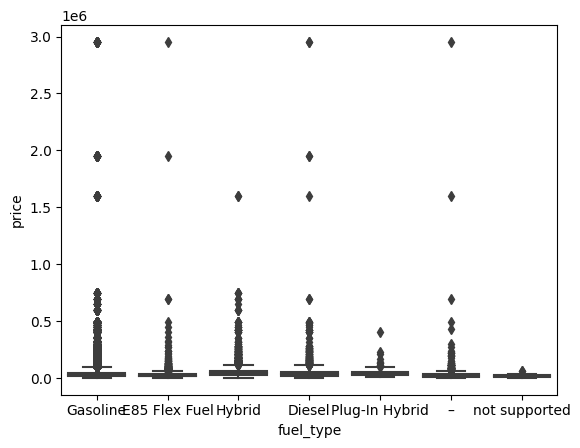

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show distribution of target values for different categories
sns.boxplot(x='fuel_type', y='price', data=x_train)
plt.show()


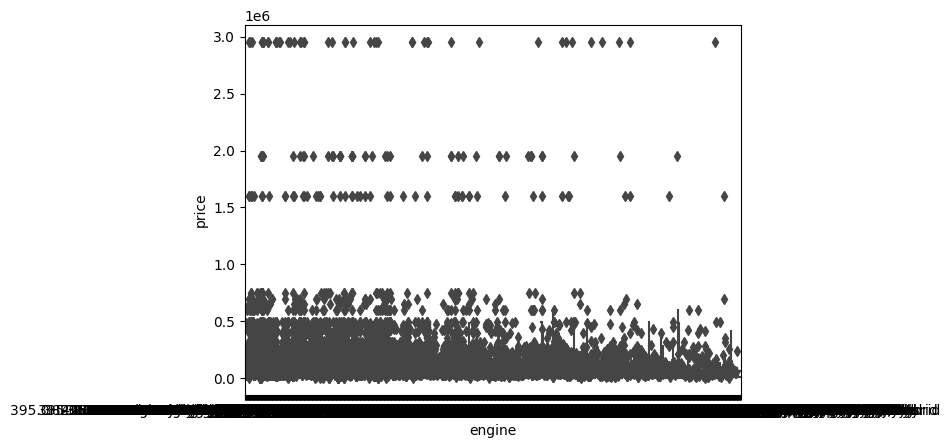

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show distribution of target values for different categories
sns.boxplot(x='engine', y='price', data=x_train)
plt.show()

In [71]:
x_train = x_train.drop(['transmission'],axis=1)
x_test = x_test.drop(['transmission'],axis=1)

In [63]:
labelencoder.fit(x_train['fuel_type'])
x_train['fuel_type']=labelencoder.transform(x_train['fuel_type'])
x_test['fuel_type']=labelencoder.transform(x_test['fuel_type'])
x_train

,model_year,milage,fuel_type,engine,transmission,accident,price,brand_model_encoded
0,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,1,4200,12778.315972
1,2002,143250,2,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,0,4999,11972.785714
2,2002,136731,1,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,1,13900,24054.754098
3,2017,19500,2,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,45000,48915.842105
4,2021,7388,2,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,1,97500,64855.673077
...,...,...,...,...,...,...,...,...
188528,2017,49000,2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,27500,51072.630631
188529,2018,28600,2,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,0,30000,56035.168224
188530,2021,13650,2,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,1,86900,64000.701754
188531,2022,13895,2,3.0L,1-Speed Automatic,1,84900,37505.533835


In [73]:
target_mean = y_train.groupby(x_train['engine']).mean()
target_mean = target_mean.rename('engine_mean')


x_train = x_train.join(target_mean, on='engine')


x_test = x_test.join(target_mean, on='engine')


global_mean = y_train.mean() 
x_test['engine_mean'].fillna(global_mean)  


x_train.rename(columns={'engine_mean': 'engine_encoded'})
x_test.rename(columns={'engine_mean': 'engine_encoded'})

,model_year,milage,fuel_type,engine,accident,brand_model_encoded,transmission_mean,engine_encoded
0,2015,98000,2,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1,19582.380000,25864.659998,20180.156788
1,2020,9142,3,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,1,74167.477612,56442.748656,77416.593849
2,2022,28121,2,3.5L V6 24V PDI DOHC Twin Turbo,1,50420.818345,63990.058786,56143.023344
3,2016,61258,2,2.0 Liter TFSI,1,28007.062500,59588.575344,47615.796721
4,2018,59000,2,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1,24829.909483,31711.979140,30597.227679
...,...,...,...,...,...,...,...,...
125685,2014,83315,2,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1,35665.622691,47123.507371,47432.316230
125686,2019,29336,2,3.0 Liter Turbo,1,56878.435714,59588.575344,60168.633050
125687,2012,77634,2,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1,29365.696203,31711.979140,26668.128127
125688,2012,112000,2,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1,33872.352941,31711.979140,26668.128127


In [ ]:
labelencoder.fit(x_train['brand'])
x_train['brand']=labelencoder.transform(x_train['brand'])
x_test['brand']=labelencoder.transform(x_test['brand'])
x_train

In [ ]:
x_train['engine'].nunique()

In [67]:
x_train['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [ ]:
labelencoder.fit(x_train['transmission'])
x_train['transmission']=labelencoder.transform(x_train['transmission'])
x_test['transmission']=labelencoder.transform(x_test['transmission'])
x_train

In [ ]:
labelencoder.fit(x_train['ext_col'])
x_train['ext_col']=labelencoder.transform(x_train['ext_col'])
x_test['ext_col']=labelencoder.transform(x_test['ext_col'])
x_train

In [ ]:
x_test['engine']

In [ ]:
x_train['engine']

In [ ]:
labelencoder.fit(x_train['engine'])

In [ ]:
x_test['engine'] = x_test['engine'].map(lambda s: '<unknown>' if s not in labelencoder.classes_ else s)
labelencoder.classes_ = np.append(labelencoder.classes_, '<unknown>')
x_test['engine'] = labelencoder.transform(x_test['engine'])
x_test

In [ ]:
print(x_train['int_col'].nunique())
print(x_test['int_col'].nunique())
x_train['engine'] = labelencoder.transform(x_train['engine'])

In [ ]:
x_train

In [ ]:
labelencoder.fit(x_train['int_col'])
x_train['int_col']=labelencoder.transform(x_train['int_col'])
x_test['int_col']=labelencoder.transform(x_test['int_col'])
x_train

In [ ]:
print(x_train['model'].nunique())
print(x_test['model'].nunique())

In [ ]:
labelencoder.fit(x_train['model'])
x_test['model'] = x_test['model'].map(lambda s: '<unknown>' if s not in labelencoder.classes_ else s)
labelencoder.classes_ = np.append(labelencoder.classes_, '<unknown>')
x_test['model'] = labelencoder.transform(x_test['model'])
x_train['model'] = labelencoder.transform(x_train['model'])
x_train

In [ ]:
x_train = x_train.drop('price',axis=1)

In [ ]:
x_train

In [79]:
from sklearn.metrics import mean_squared_error
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',  
                           n_estimators=100,  
                           learning_rate=0.1,  
                           max_depth=3)  
xgb_reg.fit(x_train,y_train)
y_hat = xgb_reg.predict(x_train)
mse = mean_squared_error(y_train,y_hat)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5107864213.747519


In [80]:
y = xgb_reg.predict(x_test)
y

array([15975.129, 80136.766, 56100.867, ..., 21324.96 , 17180.146,
       36138.91 ], dtype=float32)

In [ ]:
x_test

In [81]:
submission83 = pd.DataFrame({
    'id': x_test_id,
    'price': y
})
submission83 = submission83.to_csv('submission83.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train,y_train)
y9 = rf_reg.predict(x_test)
y9

In [ ]:
submission10 = pd.DataFrame({
    'id': x_test_id,
    'price': y9
})
submission10 = submission10.to_csv('submission10.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(x_train_scaled, y_train)


y3 = lasso_model.predict(x_test_scaled)


y3

In [ ]:
submission3 = pd.DataFrame({
    'id': x_test_id,
    'price': y3
})
submission3 = submission3.to_csv('submission3.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=1000,random_state=0,learning_rate=0.05) 

# Fit the model
xg.fit(X_train, y_train, early_stopping_rounds = 5, eval_set=[(X_valid, y_valid)])# Your code here

# Get predictions
predictions = xg.predict(x_test)

In [ ]:
predictions

In [ ]:
predictions = pd.Series(predictions.flatten())
ans = pd.DataFrame({
    'id': x_test_id,
    'price': predictions
})
ans = ans.to_csv('ans.csv', index=False)